## 1. Data Wrangling<a id='1._Data Wrangling'></a>

In [1]:
# importing relevant packages
import os
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import collections
import shap
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import traceback
import re
import string
import warnings
from datetime import datetime
import time

In [2]:
df_data = pd.read_json('ultimate_data_challenge.json') 

In [3]:
df_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df_data.tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
49995,King's Landing,0,2014-01-25,5.0,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.0,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.0,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5
49999,Astapor,0,2014-01-18,NaN,1.0,2014-04-20,Android,0.0,False,0.0,3.49,5.0


In [5]:
df_data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [6]:
df_data.shape

(50000, 12)

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [8]:
df_data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [9]:
df_data["signup_date"]=pd.to_datetime(df_data.signup_date)
df_data["last_trip_date"]=pd.to_datetime(df_data.last_trip_date)


In [10]:
Earliest_date=df_data.last_trip_date.min()
Last_date=df_data.last_trip_date.max()
print(Earliest_date)
print(Last_date)

2014-01-01 00:00:00
2014-07-01 00:00:00


In [11]:
period=30
Thirtydays_period=pd.Timedelta(days=period)
Thirtydays_period

Timedelta('30 days 00:00:00')

## 1.1  Identify active user<a id='1.1_Identify active user'></a>

In [12]:
df_data['active']=df_data.last_trip_date.apply(lambda x: 1 if (Last_date-x) <= Thirtydays_period else 0)
df_data.head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


Number and percentage of inactive and active users
0    31196
1    18804
Name: active, dtype: int64
0    62.392
1    37.608
Name: active, dtype: float64


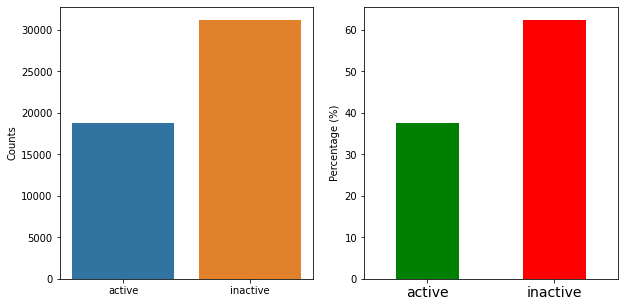

In [13]:
print("Number and percentage of inactive and active users")
print(df_data.active.value_counts())
print(df_data.active.value_counts()*100/df_data.active.count())

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
x = df_data.active.replace(to_replace=[0, 1], value=['inactive','active'])
g1=sns.countplot(x=x,ax=ax[0])
g1.set(ylabel='Counts')
g1.set(xlabel=None)


y=x.value_counts().sort_values()*100/len(df_data.active)
g2=y.replace(to_replace=[0, 1], value=['inactive','active']).plot(kind='bar', color=('g', 'r'))
plt.ylabel('Percentage (%)')
g2.set_xticklabels(g2.get_xticklabels(), rotation=0,size=14)
plt.show()



## 2  Exploratory Data analysis <a id='1.4_Exploratory Data analysis'></a>

## 2.1  Explore the data <a id='2.2_ Explore the data'></a>

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  int64 

In [15]:
df_data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active'],
      dtype='object')

In [16]:
df_data.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

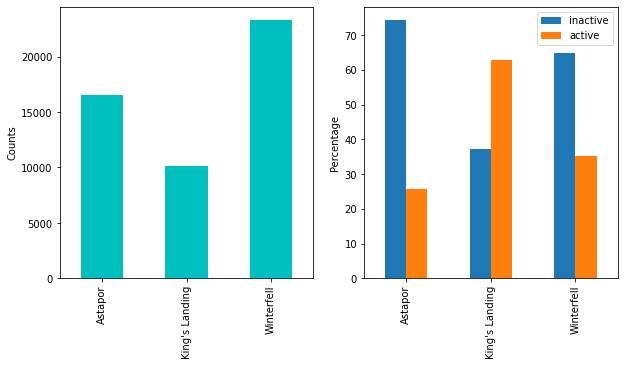

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
freq_df = df_data.groupby(['city'])['active'].value_counts().unstack()

ax1=freq_df.plot(kind="bar", stacked=True,ax=ax[0],color=['c'],legend=False)

#ax1=df_data.city.value_counts().plot(kind='bar',ax=ax[0])
ax1.set_xlabel(None)

ax1.set_ylabel('Counts')


pct_df = freq_df.divide(freq_df.sum(axis=1)/100, axis=0)
ax2=pct_df.plot(kind="bar", stacked=False,ax=ax[1])
ax2.set_xlabel(None)
ax2.set_ylabel('Percentage')
ax2.legend(['inactive', 'active'])
plt.show()





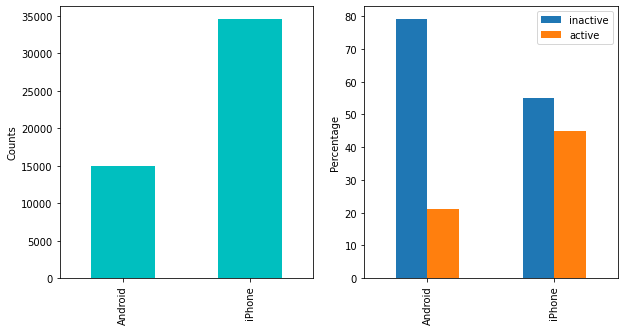

In [18]:
#df_data.phone.value_counts().plot(kind='bar')
#plt.xlabel('Phone')
#plt.ylabel('Counts')
#plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
freq_df = df_data.groupby(['phone'])['active'].value_counts().unstack()

ax1=freq_df.plot(kind="bar", stacked=True,ax=ax[0],color=['c'],legend=False)

#ax1=df_data.city.value_counts().plot(kind='bar',ax=ax[0])
ax1.set_xlabel(None)

ax1.set_ylabel('Counts')


pct_df = freq_df.divide(freq_df.sum(axis=1)/100, axis=0)
ax2=pct_df.plot(kind="bar", stacked=False,ax=ax[1])
ax2.set_xlabel(None)
ax2.set_ylabel('Percentage')
ax2.legend(['inactive', 'active'])
plt.show()




125
0


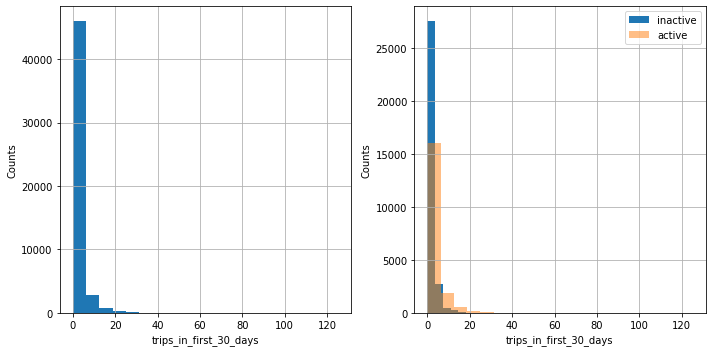

In [19]:
print(df_data.trips_in_first_30_days.max())
print(df_data.trips_in_first_30_days.min())

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax1=df_data.trips_in_first_30_days.hist(bins=20, ax=ax[0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('trips_in_first_30_days')

df_data[df_data.active==0].trips_in_first_30_days.hist(bins=20,ax=ax[1])
ax2=df_data[df_data.active==1].trips_in_first_30_days.hist(bins=20,ax=ax[1], alpha=0.5)
ax2.set_ylabel('Counts')
ax2.set_xlabel('trips_in_first_30_days')
plt.tight_layout()
ax2.legend(['inactive', 'active'])
plt.show()





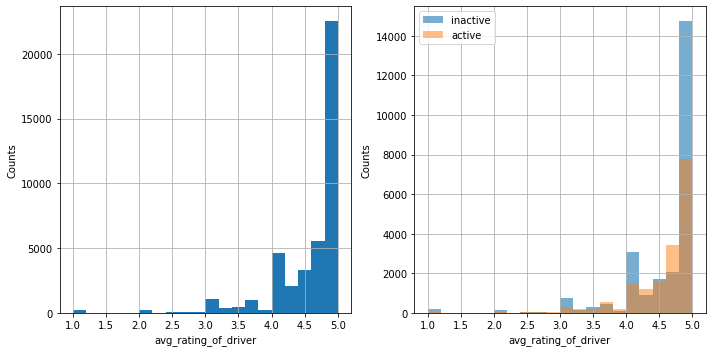

In [20]:
#df_data.avg_rating_of_driver.hist(bins=20)
#plt.xlabel('avg_rating_of_driver')
#plt.ylabel('Counts')
#plt.show()


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax1=df_data.avg_rating_of_driver.hist(bins=20, ax=ax[0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('avg_rating_of_driver')

df_data[df_data.active==0].avg_rating_of_driver.hist(bins=20,ax=ax[1], alpha=0.6)
ax2=df_data[df_data.active==1].avg_rating_of_driver.hist(bins=20,ax=ax[1], alpha=0.5)
ax2.set_ylabel('Counts')
ax2.set_xlabel('avg_rating_of_driver')
plt.tight_layout()
ax2.legend(['inactive', 'active'])
plt.show()



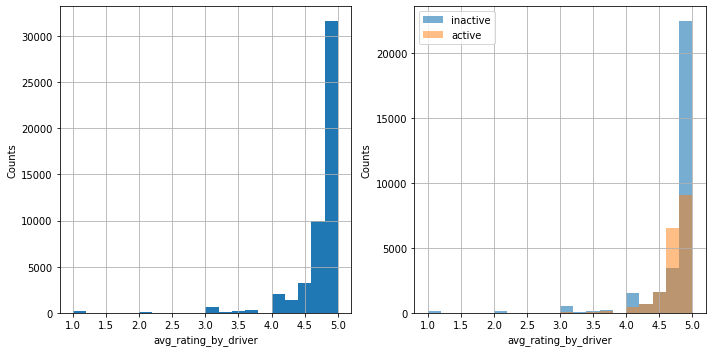

In [21]:
#df_data.avg_rating_by_driver.hist(bins=20)
#plt.xlabel('avg_rating_by_driver')
#plt.ylabel('Counts')
#plt.show()


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax1=df_data.avg_rating_by_driver.hist(bins=20, ax=ax[0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('avg_rating_by_driver')

df_data[df_data.active==0].avg_rating_by_driver.hist(bins=20,ax=ax[1],alpha=0.6)
ax2=df_data[df_data.active==1].avg_rating_by_driver.hist(bins=20,ax=ax[1], alpha=0.5)
ax2.set_ylabel('Counts')
ax2.set_xlabel('avg_rating_by_driver')
plt.tight_layout()
ax2.legend(['inactive', 'active'])
plt.show()



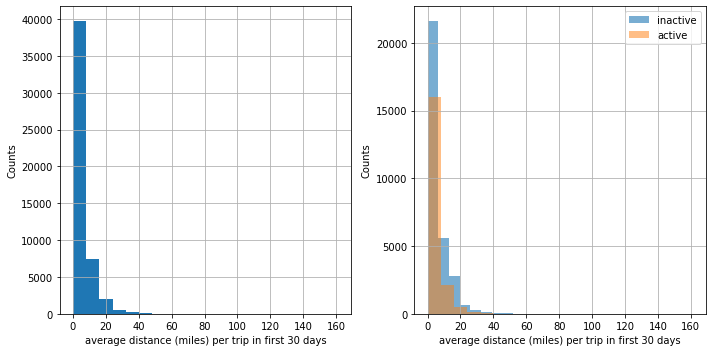

In [22]:
#df_data.avg_dist.hist(bins=20)
#plt.xlabel('average distance (miles) per trip in first 30 days')
#plt.ylabel('Counts')
#plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax1=df_data.avg_dist.hist(bins=20, ax=ax[0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('average distance (miles) per trip in first 30 days')

df_data[df_data.active==0].avg_dist.hist(bins=20,ax=ax[1],alpha=0.6)
ax2=df_data[df_data.active==1].avg_dist.hist(bins=20,ax=ax[1], alpha=0.5)
ax2.set_ylabel('Counts')
ax2.set_xlabel('average distance (miles) per trip in first 30 days')
plt.tight_layout()
ax2.legend(['inactive', 'active'])
plt.show()

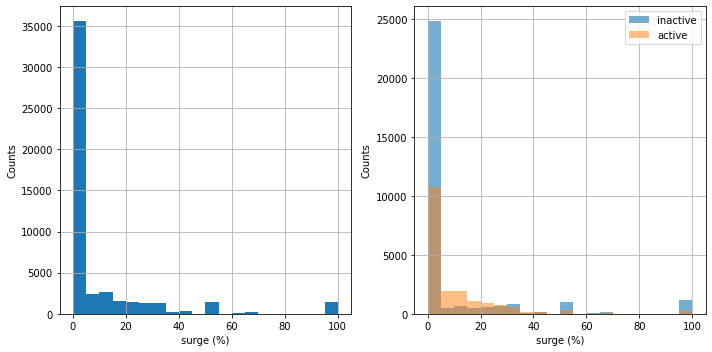

In [23]:
#df_data.surge_pct.hist(bins=20)
#plt.xlabel('surge (%)')
#plt.ylabel('Counts')
#plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax1=df_data.surge_pct.hist(bins=20, ax=ax[0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('surge (%)')

df_data[df_data.active==0].surge_pct.hist(bins=20,ax=ax[1],alpha=0.6)
ax2=df_data[df_data.active==1].surge_pct.hist(bins=20,ax=ax[1], alpha=0.5)
ax2.set_ylabel('Counts')
ax2.set_xlabel('surge (%)')
plt.tight_layout()
ax2.legend(['inactive', 'active'])
plt.show()

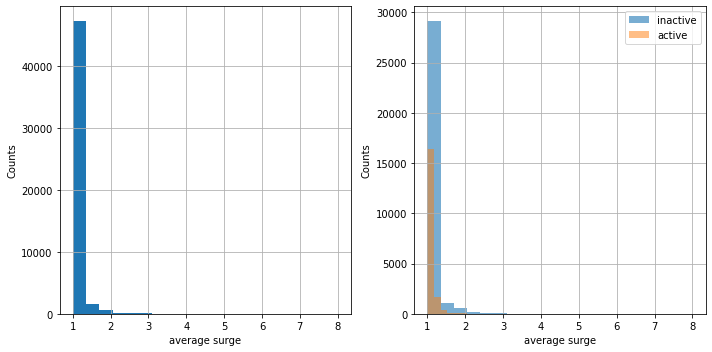

In [24]:
#df_data.avg_surge.hist(bins=20)
#plt.xlabel('average surge')
#plt.ylabel('Counts')
#plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax1=df_data.avg_surge.hist(bins=20, ax=ax[0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('average surge')

df_data[df_data.active==0].avg_surge.hist(bins=20,ax=ax[1],alpha=0.6)
ax2=df_data[df_data.active==1].avg_surge.hist(bins=20,ax=ax[1], alpha=0.5)
ax2.set_ylabel('Counts')
ax2.set_xlabel('average surge')
plt.tight_layout()
ax2.legend(['inactive', 'active'])
plt.show()

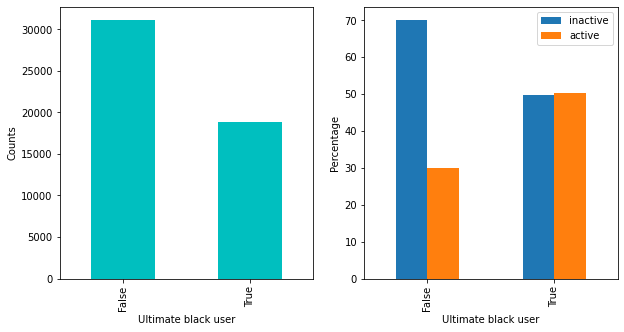

In [25]:
#df_data.ultimate_black_user.value_counts().plot(kind='bar')
#plt.xlabel('Ultimate black user')
#plt.ylabel('Counts')
#plt.show()


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
freq_df = df_data.groupby(['ultimate_black_user'])['active'].value_counts().unstack()

ax1=freq_df.plot(kind="bar", stacked=True,ax=ax[0],color=['c'],legend=False)

#ax1=df_data.city.value_counts().plot(kind='bar',ax=ax[0])

ax1.set_ylabel('Counts')
ax1.set_xlabel('Ultimate black user')


pct_df = freq_df.divide(freq_df.sum(axis=1)/100, axis=0)
ax2=pct_df.plot(kind="bar", stacked=False,ax=ax[1])
ax2.set_ylabel('Percentage')
ax2.legend(['inactive', 'active'])
ax2.set_xlabel('Ultimate black user')
plt.show()


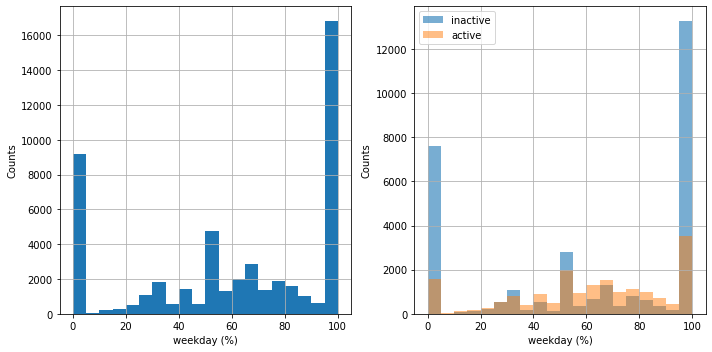

In [26]:
#df_data.weekday_pct.hist(bins=20)
#plt.xlabel('weekday (%)')
#plt.ylabel('Counts')
#plt.show()


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax1=df_data.weekday_pct.hist(bins=20, ax=ax[0])
ax1.set_ylabel('Counts')
ax1.set_xlabel('weekday (%)')

df_data[df_data.active==0].weekday_pct.hist(bins=20,ax=ax[1],alpha=0.6)
ax2=df_data[df_data.active==1].weekday_pct.hist(bins=20,ax=ax[1], alpha=0.5)
ax2.set_ylabel('Counts')
ax2.set_xlabel('weekday (%)')
plt.tight_layout()
ax2.legend(['inactive', 'active'])
plt.show()

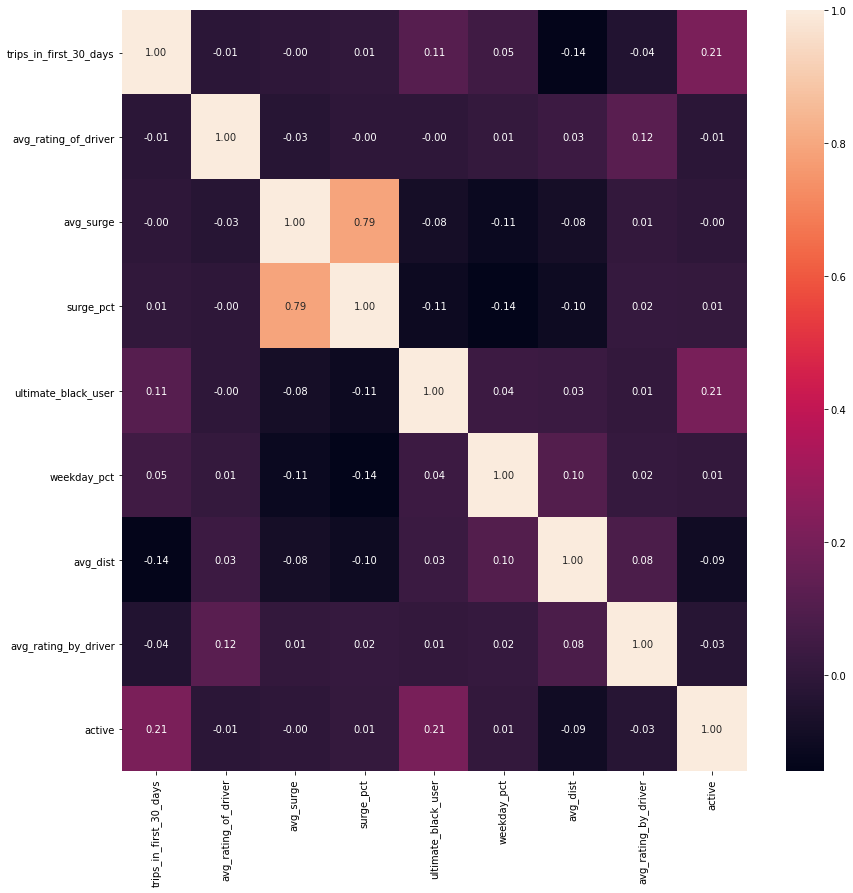

In [27]:
plt.subplots(figsize=(14,14))

corr = df_data.corr(method='pearson')
ax = sns.heatmap(corr, annot=True,annot_kws={'size':10}, fmt=".2f")
plt.savefig('heatmap.png',dpi=600)

In [28]:
corr['active'].sort_values(ascending=False)

active                    1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: active, dtype: float64

## 3.  Data pre-processing <a id='3._Data pre-processing'></a>

In [29]:
print(df_data.phone.value_counts())
print("Missing",df_data.phone.isnull().sum())

iPhone     34582
Android    15022
Name: phone, dtype: int64
Missing 396


In [30]:
df_data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active                       0
dtype: int64

In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  int64 

## 3.1  Imputing <a id='3.1_Imputing'></a>

In [32]:
#imputing
df_data["phone"]=df_data.phone.fillna("Other")
df_data["avg_rating_by_driver"]=df_data.avg_rating_by_driver.fillna(df_data.avg_rating_by_driver.mean())
df_data["avg_rating_of_driver"]=df_data.avg_rating_of_driver.fillna(df_data.avg_rating_of_driver.mean())

In [33]:
df_data.ultimate_black_user.replace('True','1',inplace=True)
df_data.ultimate_black_user.replace('False','0',inplace=True)

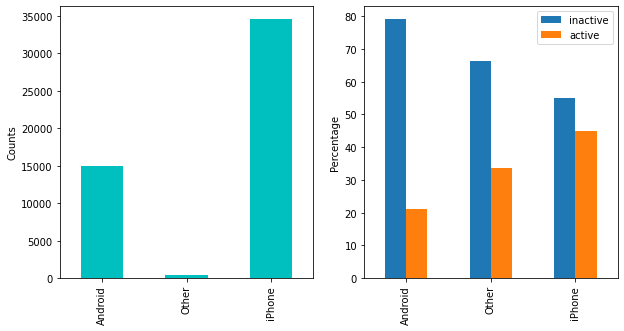

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
freq_df = df_data.groupby(['phone'])['active'].value_counts().unstack()

ax1=freq_df.plot(kind="bar", stacked=True,ax=ax[0],color=['c'],legend=False)

#ax1=df_data.city.value_counts().plot(kind='bar',ax=ax[0])
ax1.set_xlabel(None)

ax1.set_ylabel('Counts')


pct_df = freq_df.divide(freq_df.sum(axis=1)/100, axis=0)
ax2=pct_df.plot(kind="bar", stacked=False,ax=ax[1])
ax2.set_xlabel(None)
ax2.set_ylabel('Percentage')
ax2.legend(['inactive', 'active'])
plt.show()

In [35]:
df_data["ultimate_black_user"]=df_data.ultimate_black_user.astype(int)

In [36]:
df_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0


## 3.2  Hot encoding <a id='3.2_Hot encoding'></a>

In [37]:
from sklearn.preprocessing import OneHotEncoder
df_encoded =pd.get_dummies(df_data, columns=['phone','city'])

In [38]:
columns_to_drop=['signup_date','last_trip_date']
df_encoded=df_encoded.drop(columns=columns_to_drop)

In [39]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  int64  
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   active                  50000 non-null  int64  
 9   phone_Android           50000 non-null  uint8  
 10  phone_Other             50000 non-null  uint8  
 11  phone_iPhone            50000 non-null  uint8  
 12  city_Astapor            50000 non-null  uint8  
 13  city_King's Landing     50000 non-null  uint8  
 14  city_Winterfell         50000 non-null

In [40]:
df_encoded.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,phone_Android,phone_Other,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,0.37708,60.926084,5.796827,4.778158,0.376080,0.300440,0.007920,0.691640,0.330680,0.202600,0.466720
std,3.792684,0.564977,0.222336,19.958811,0.48466,37.081503,5.707357,0.445753,0.484405,0.458454,0.088642,0.461821,0.470463,0.401941,0.498896
min,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000,1.000000,0.000000,0.00000,33.300000,2.420000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.700000,1.000000,0.000000,0.00000,66.700000,3.880000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,1.00000,100.000000,6.940000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,1.00000,100.000000,160.960000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


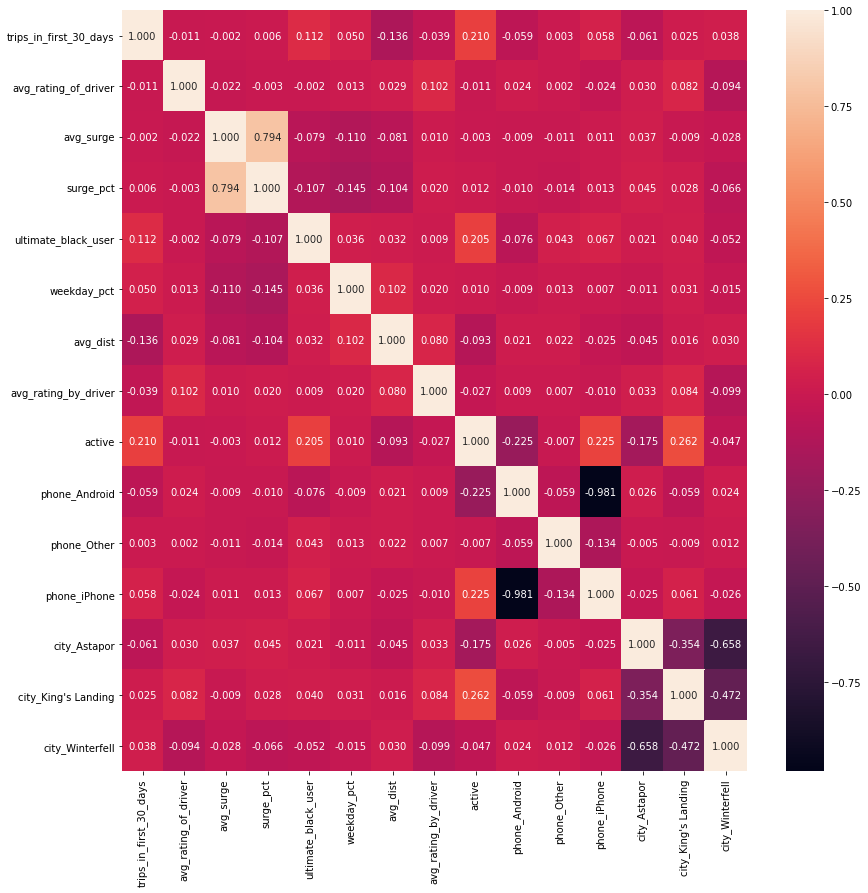

In [41]:
plt.subplots(figsize=(14,14))

corr = df_encoded.corr(method='pearson')
ax = sns.heatmap(corr, annot=True,annot_kws={'size':10}, fmt=".3f")
plt.savefig('heatmap1.png',dpi=600)

In [42]:
corr['active'].sort_values(ascending=False)

active                    1.000000
city_King's Landing       0.262284
phone_iPhone              0.225244
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
phone_Other              -0.007419
avg_rating_of_driver     -0.010829
avg_rating_by_driver     -0.026748
city_Winterfell          -0.046611
avg_dist                 -0.092780
city_Astapor             -0.174655
phone_Android            -0.225464
Name: active, dtype: float64

In [43]:
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [44]:
x=df_encoded.drop(columns='active')
y=df_encoded.active

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=47)

In [46]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    #print("justmiss", justmiss)
    #print("notmiss", notmiss)
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            #print("I am here 1",r, n,len(d2))
            n = n - 1 
            
        except Exception as e:
            n = n - 1
            #print("I am here e",n)

    if len(d2) == 1:
        #print("I am second step ",r, n)
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        #print(justmiss.count().Y)
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    print(np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT))
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    #print("hi",d3.IV )
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    for i in x:
        print(i)
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                #print("Number and unique value greater than 2")
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                #print("I am here 2")
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)


In [48]:
final_iv, IV = data_vars(X_train, y_train)

trips_in_first_30_days
0   -0.350690
1   -0.039172
2    0.740957
dtype: float64
avg_rating_of_driver
0    0.016024
1   -0.016157
dtype: float64
avg_surge
0   -0.419879
1    0.828135
dtype: float64
surge_pct
0   -0.420964
1    0.828683
dtype: float64
ultimate_black_user
weekday_pct
0    0.135121
1   -0.152572
dtype: float64
avg_dist
0    0.089091
1   -0.091588
dtype: float64
avg_rating_by_driver
0   -1.634479
1    0.003771
dtype: float64
phone_Android
phone_Other
phone_iPhone
city_Astapor
city_King's Landing
city_Winterfell


In [49]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
print(X2.columns)
X2.head()

(35000, 9)

Index(['avg_surge', 'city_Astapor', 'city_King's Landing', 'phone_Android',
       'phone_iPhone', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct'],
      dtype='object')


,avg_surge,city_Astapor,city_King's Landing,phone_Android,phone_iPhone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
12738,1.0,1,0,1,0,0.0,0,0,50.0
422,1.0,1,0,1,0,0.0,0,0,100.0
3460,1.0,0,0,0,1,0.0,1,0,66.7
30638,1.0,1,0,0,1,0.0,1,1,0.0
2860,1.0,0,0,1,0,0.0,2,0,71.4


In [50]:
display(X2.shape[1])
for i in range(X2.shape[1]):
    print((i, variance_inflation_factor(X2.values, i) ))



9

(0, 46.67701639041643)
(1, 1.7194503494673985)
(2, 1.4418935293958035)
(3, 13.190732509665077)
(4, 29.090347666961094)
(5, 2.7513069129049934)
(6, 1.3878434887015596)
(7, 1.6536789392065332)
(8, 3.740005879626126)


In [51]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
    count = 0
    while max_vif > vif_threshold:
        count += 1
        print("Iteration # "+str(count))
        vif = pd.DataFrame()
        vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns
        
        if vif['VIFactor'].max() > vif_threshold:
            print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
            df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
            max_vif = vif['VIFactor'].max()
        else:
            print('Complete')
            return df, vif.sort_values('VIFactor')  

X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1
Removing avg_surge with VIF of 46.677016
Iteration # 2
Complete


In [52]:
X_train=final_df
display(len(X_train.columns))
display(X_train.columns)
X_train.head()

8

Index(['city_Astapor', 'city_King's Landing', 'phone_Android', 'phone_iPhone',
       'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct'],
      dtype='object')

,city_Astapor,city_King's Landing,phone_Android,phone_iPhone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
12738,1,0,1,0,0.0,0,0,50.0
422,1,0,1,0,0.0,0,0,100.0
3460,0,0,0,1,0.0,1,0,66.7
30638,1,0,0,1,0.0,1,1,0.0
2860,0,0,1,0,0.0,2,0,71.4


In [53]:
#X_train=X_train.drop(columns=["weekday_pct","surge_pct"])

## 4  Data modeling <a id='4_Data modeling'></a>

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [55]:
X_test=X_test[X_train.columns]
X_test.head()

,city_Astapor,city_King's Landing,phone_Android,phone_iPhone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
48243,0,0,0,1,0.0,0,1,50.0
48967,0,0,0,1,0.0,1,1,50.0
36155,0,0,0,1,0.0,1,1,50.0
11305,1,0,0,1,7.1,2,1,64.3
23749,0,0,0,1,13.7,5,1,47.1


In [56]:
def run_regression_accuracy(X_train, y_train, X_test, y_test):
    
    
    scaler = StandardScaler()

    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.fit_transform(X_test)
    
    logreg = LogisticRegression()
    logreg.fit(X_train_scaled, y_train)
    y_pred = logreg.predict(X_test_scaled)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    #cm = confusion_matrix(y_test, y_pred)
    #print('\nConfusion matrix: \n',cm)
    
    print(confusion_matrix(y_test, y_pred))
    
    matrix = confusion_matrix(y_test, y_pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    
    
    print('\nConfusion matrix: \n',matrix)
    


    # Build the plot
    plt.figure(figsize=(4,4))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['inactive', 'active']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for logistic Regression Model')
    plt.show()
        

    
    print('\nClassification report: \n',classification_report(y_test, y_pred))


    
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
  

Accuracy of logistic regression classifier on test set: 0.61
[[8000 1364]
 [2859 2777]]

Confusion matrix: 
 [[0.85433575 0.14566425]
 [0.50727466 0.49272534]]


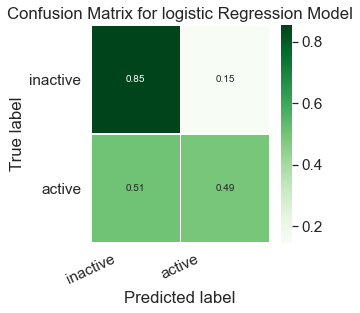


Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.85      0.79      9364
           1       0.67      0.49      0.57      5636

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000



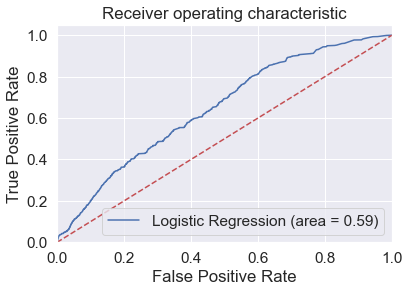

In [57]:
logreg = run_regression_accuracy(X_train, y_train, X_test, y_test)

In [58]:
from sklearn.ensemble import RandomForestClassifier

#tuned_parameters = {'n_estimators':range(20,91,10), 'max_depth':range(2,7), 'min_samples_split':range(100,1000,200)}

#tuned_parameters={ #'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 #'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [200, 400, 600, 800, 1000]}#, 1200, 1400, 1600, 1800, 2000]}


#tuned_parameters={ #'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50],
# #'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [ 2, 4, 6],
# 'min_samples_split': [ 5, 8, 10],
# 'n_estimators': [200, 400, 800, 1000, 1200]}#, 1200, 1400, 1600, 1800, 2000]}


tuned_parameters={ #'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40],
 #'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [ 4, 6, 8,10],
 'min_samples_split': [ 5, 8, 10],
 'n_estimators': [100,500,800,1000, 1200]}#, 1200, 1400, 1600, 1800, 2000]}





#model = RandomForestClassifier(random_state=99)

#clf = GridSearchCV(estimator=model, param_grid=tuned_parameters, cv=5,  verbose=2, n_jobs = -1)
#clf.fit(X_train, y_train)




In [ ]:
##print("Best parameters:")
#print(clf.best_params_, '\n')


In [ ]:
#print("Grid scores on development set:")
#means = clf.cv_results_['mean_test_score']
#stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#        print("%0.3f (+/-%0.03f) for %r"
#              % (mean, std * 2, params))
#print()
#print("Detailed classification report:")
#y_true, y_pred = y_test, clf.predict(X_test)
#print(confusion_matrix(y_true, y_pred), '\n')

In [59]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
#rf = RandomForestClassifier(n_estimators = 30, random_state = 99, max_depth=6, min_samples_split=500)
rf = RandomForestClassifier(max_depth=30,  min_samples_leaf=4, min_samples_split=10, n_estimators = 1000, random_state = 99  )
#rf = RandomForestClassifier( max_depth=20,  min_samples_leaf=6,  min_samples_split=5, n_estimators = 1200, random_state = 99)
#rf=RandomForestClassifier(max_depth=30, min_samples_leaf=8, min_samples_split=5, n_estimators=1200)


# Train the model on training data
rf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

Features [0.03228306 0.11279188 0.04601137 0.04989776 0.23586657 0.12889996
 0.06688885 0.32736055]


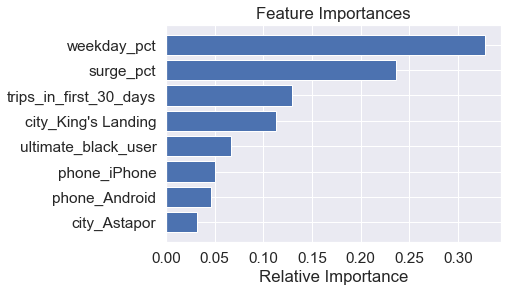

[[8031 1333]
 [1945 3691]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      9364
           1       0.73      0.65      0.69      5636

    accuracy                           0.78     15000
   macro avg       0.77      0.76      0.76     15000
weighted avg       0.78      0.78      0.78     15000



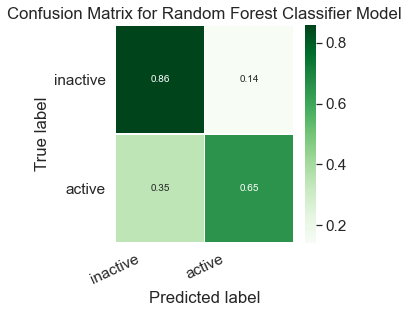

In [60]:
y_pred1 = rf.predict(X_test)


print("Features",rf.feature_importances_)

importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



roc1 = roc_auc_score(y_test, y_pred1)

roc1

#conf1 = confusion_matrix(y_test, y_pred1)
#conf1

print(confusion_matrix(y_test, y_pred1))
matrix = confusion_matrix(y_test, y_pred1)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
#print(matrix)

print(classification_report(y_test, y_pred1))



# Build the plot
plt.figure(figsize=(4,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['inactive', 'active']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Classifier Model')
plt.show()

0.7562716975663558


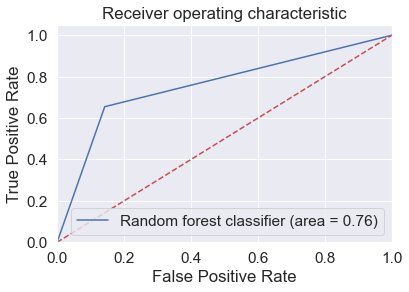

In [61]:
roc1 = roc_auc_score(y_test, y_pred1)
print(roc1)
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred1)

plt.figure()
plt.plot(fpr1, tpr1, label='Random forest classifier (area = %0.2f)' % roc1 )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()